In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df = pd.read_csv("Monthly_data_cmo.csv", parse_dates=['date'])

In [4]:
df.head(5)

,APMC,Commodity,Year,Month,arrivals_in_qtl,min_price,max_price,modal_price,date,district_name,state_name
0,Ahmednagar,Bajri,2015,April,79,1406,1538,1463,2015-04-01,Ahmadnagar,Maharashtra
1,Ahmednagar,Bajri,2016,April,106,1788,1925,1875,2016-04-01,Ahmadnagar,Maharashtra
2,Ahmednagar,Wheat(Husked),2015,April,1253,1572,1890,1731,2015-04-01,Ahmadnagar,Maharashtra
3,Ahmednagar,Wheat(Husked),2016,April,387,1750,2220,1999,2016-04-01,Ahmadnagar,Maharashtra
4,Ahmednagar,Sorgum(Jawar),2015,April,3825,1600,2200,1900,2015-04-01,Ahmadnagar,Maharashtra


In [5]:
df.drop(columns=['Year', 'Month', 'state_name'], inplace=True)

In [6]:
df.sample(5)

,APMC,Commodity,arrivals_in_qtl,min_price,max_price,modal_price,date,district_name
39341,Sailu,Soybean,447,3190,3233,3229,2015-03-01,Parbhani
44000,Pune-Manjri,Ghosali(Bhaji),39,0,3646,0,2015-05-01,Pune
21485,Jalna,Pomegranate,8,100,600,400,2014-12-01,Jalna
12640,Nandura,Sesamum,3,7000,8000,7800,2015-04-01,Buldhana
23807,Kolhapur-Laxmipuri,Chillies(Red),59,14400,15580,15050,2015-11-01,Kolhapur


In [7]:
df.iloc[0, :].values

array(['Ahmednagar', 'Bajri', 79, 1406, 1538, 1463,
       Timestamp('2015-04-01 00:00:00'), 'Ahmadnagar'], dtype=object)

In [8]:
rows, columns = df.shape
print("The Number of rows in the dataset is:", rows)
print("The Number of columns in the dataset is:", columns)

The Number of rows in the dataset is: 62429
The Number of columns in the dataset is: 8


In [9]:
df.columns

Index(['APMC', 'Commodity', 'arrivals_in_qtl', 'min_price', 'max_price',
       'modal_price', 'date', 'district_name'],
      dtype='object')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62429 entries, 0 to 62428
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   APMC             62429 non-null  object        
 1   Commodity        62429 non-null  object        
 2   arrivals_in_qtl  62429 non-null  int64         
 3   min_price        62429 non-null  int64         
 4   max_price        62429 non-null  int64         
 5   modal_price      62429 non-null  int64         
 6   date             62429 non-null  datetime64[ns]
 7   district_name    62429 non-null  object        
dtypes: datetime64[ns](1), int64(4), object(3)
memory usage: 3.8+ MB


In [11]:
df.describe(include=['float64', 'int64'])

,arrivals_in_qtl,min_price,max_price,modal_price
count,6.242900e+04,6.242900e+04,6.242900e+04,62429.000000
mean,6.043088e+03,2.945228e+03,3.688814e+03,3296.003989
std,3.470331e+04,1.318396e+04,7.662962e+03,3607.792534
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000
25%,3.800000e+01,1.250000e+03,1.600000e+03,1450.000000
50%,2.110000e+02,1.976000e+03,2.797000e+03,2425.000000
75%,1.364000e+03,3.900000e+03,4.647000e+03,4257.000000
max,1.450254e+06,3.153038e+06,1.600090e+06,142344.000000


In [12]:
df.describe(include='object')

,APMC,Commodity,district_name
count,62429,62429,62429
unique,349,352,33
top,Mumbai,Gram,Pune
freq,1538,3972,6366


In [13]:
df.duplicated().sum()

0

# Feature engieering

In [14]:
df['APMC'].value_counts().sort_values(ascending=False).head(10)

APMC
Mumbai         1538
Pune           1513
Nagpur         1340
Barshi         1076
Jalgaon        1055
Solapur         984
Kamthi          967
Shrirampur      947
Kalyan          932
Pune-Manjri     930
Name: count, dtype: int64

In [15]:
df['Commodity'].value_counts().sort_values(ascending=False).head(10)

Commodity
Gram                3972
Wheat(Husked)       3946
Sorgum(Jawar)       3560
Soybean             3545
Pigeon Pea (Tur)    3389
Maize               2422
Green Gram          2294
Bajri               2250
Onion               1796
Black Gram          1557
Name: count, dtype: int64

In [16]:
df['district_name'].value_counts().sort_values(ascending=False).head(10)

district_name
Pune          6366
Ahmadnagar    4638
Nagpur        4527
Solapur       4524
Nasik         3620
Satara        2771
Buldhana      2669
Amaravathi    2590
Jalgaon       2579
Aurangabad    2312
Name: count, dtype: int64

In [17]:
df['year'] = pd.DatetimeIndex(df['date']).year
df['month'] = pd.DatetimeIndex(df['date']).month
df['day'] = pd.DatetimeIndex(df['date']).weekday

# Handling Null values

In [18]:
df.isnull().sum()

APMC               0
Commodity          0
arrivals_in_qtl    0
min_price          0
max_price          0
modal_price        0
date               0
district_name      0
year               0
month              0
day                0
dtype: int64

In [19]:
Missing_data = pd.DataFrame({'Missing count': df.isnull().sum(), 'Missing Percentage': (df.isnull().sum()/df.shape[0])*100})
Missing_data

,Missing count,Missing Percentage
APMC,0,0.0
Commodity,0,0.0
arrivals_in_qtl,0,0.0
min_price,0,0.0
max_price,0,0.0
modal_price,0,0.0
date,0,0.0
district_name,0,0.0
year,0,0.0
month,0,0.0


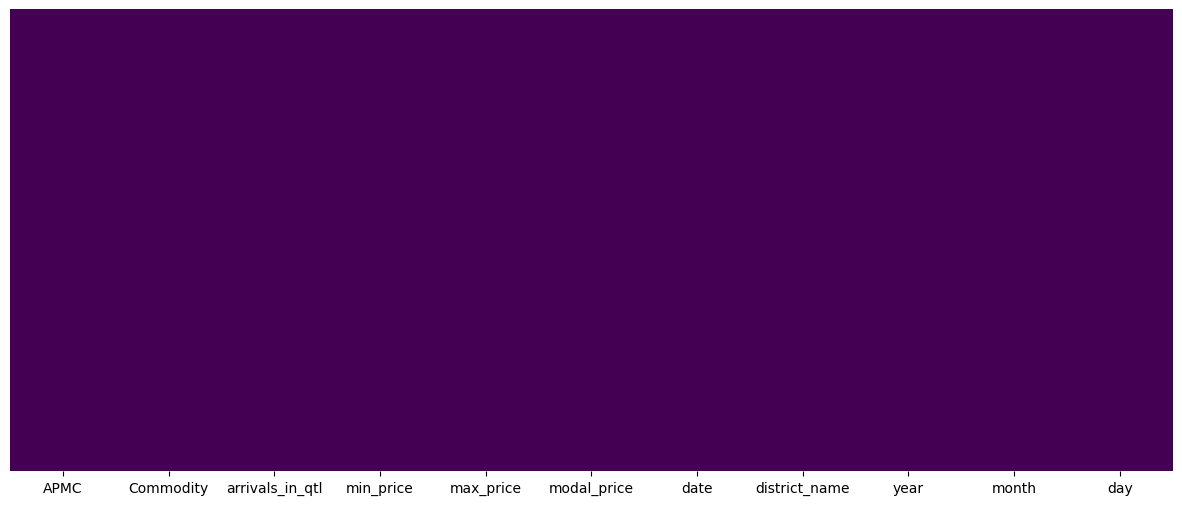

In [20]:
plt.figure(figsize=(15, 6)) 
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis');

In [21]:
df.columns

Index(['APMC', 'Commodity', 'arrivals_in_qtl', 'min_price', 'max_price',
       'modal_price', 'date', 'district_name', 'year', 'month', 'day'],
      dtype='object')

In [22]:
numerical_columns = ['arrivals_in_qtl', 'min_price', 'max_price', 'modal_price', 'year', 'month', 'day']

In [23]:
categorical_columns = ['APMC', 'Commodity', 'district_name']

In [24]:
def distrubutionPlot(column):
    
    plt.figure(figsize=(20, 5))

    plt.subplot(1, 3, 1)
    plt.xlabel("Distrubution")
    plt.ylabel("Count")
    plt.title(column)
    sns.histplot(x=df[column], bins=10)

    plt.subplot(1, 3, 2)
    plt.title(column)
    sns.boxplot(data=df[column])
    
    plt.subplot(1, 3, 3)
    plt.title(column)
    sns.histplot(x=df[column], bins=10, kde=True)
    
    plt.show()

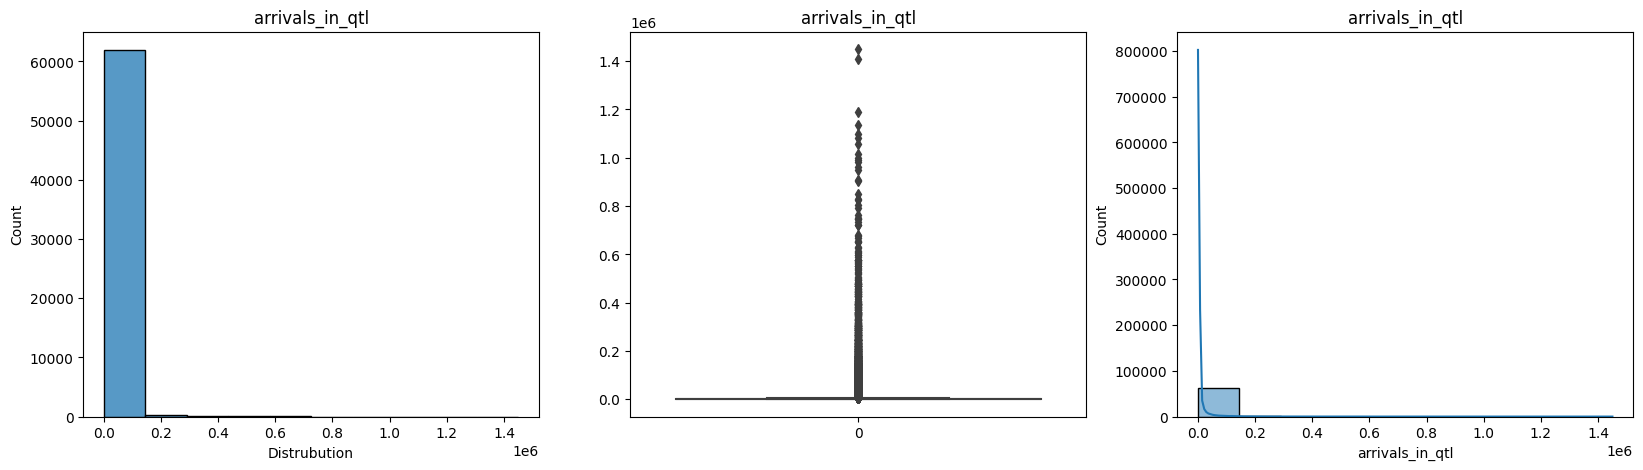

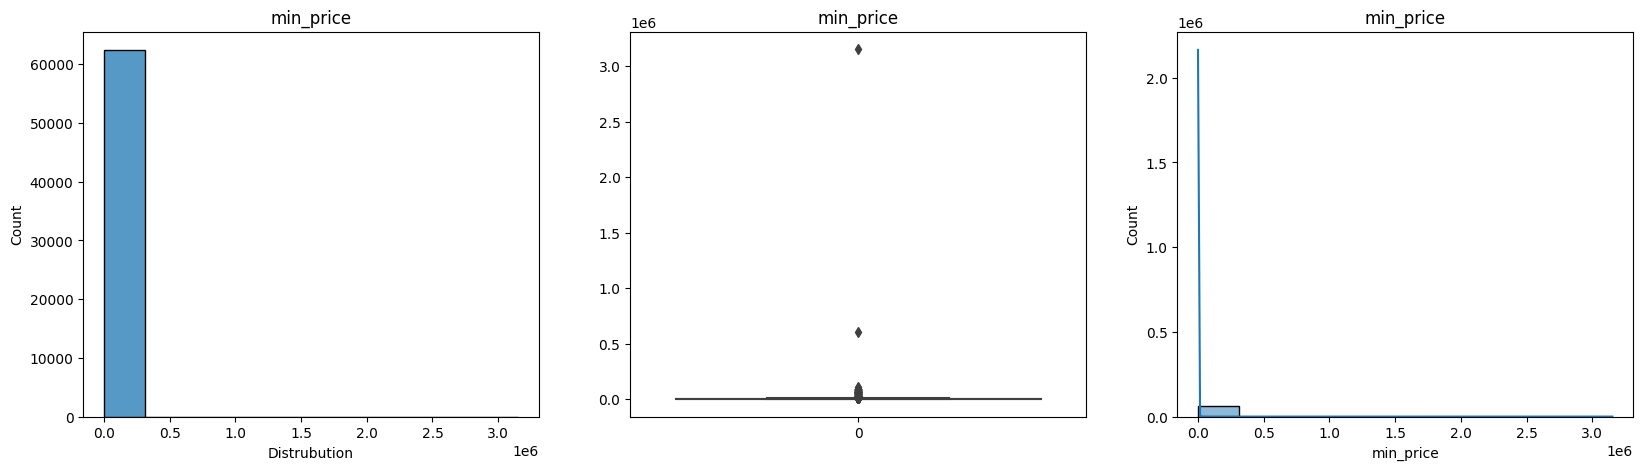

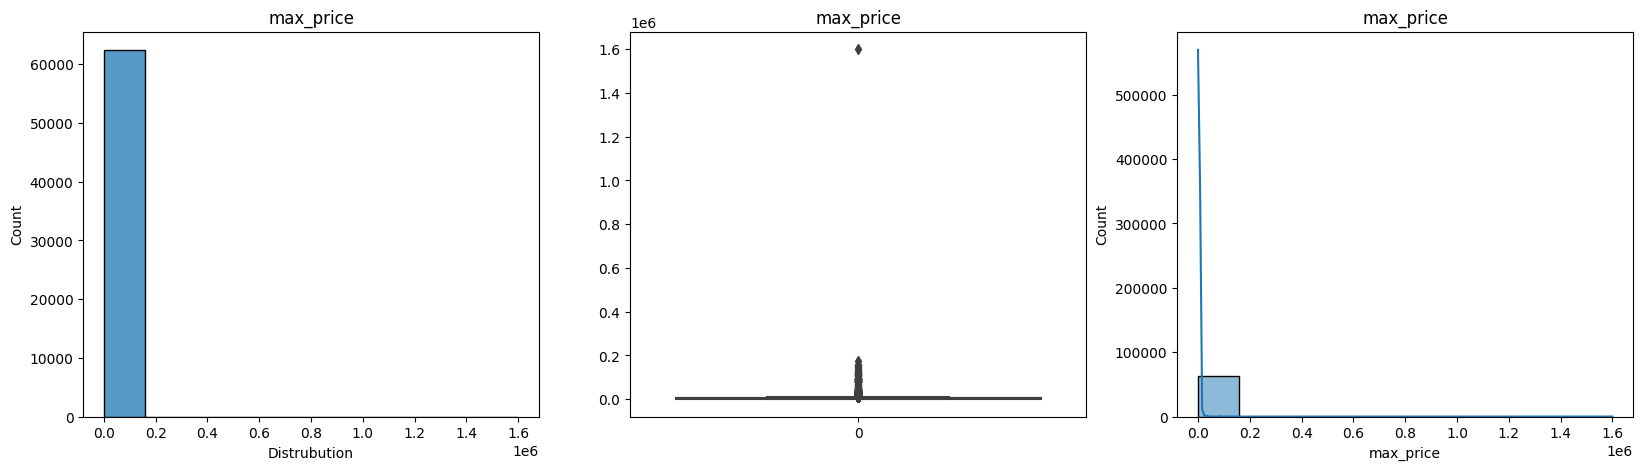

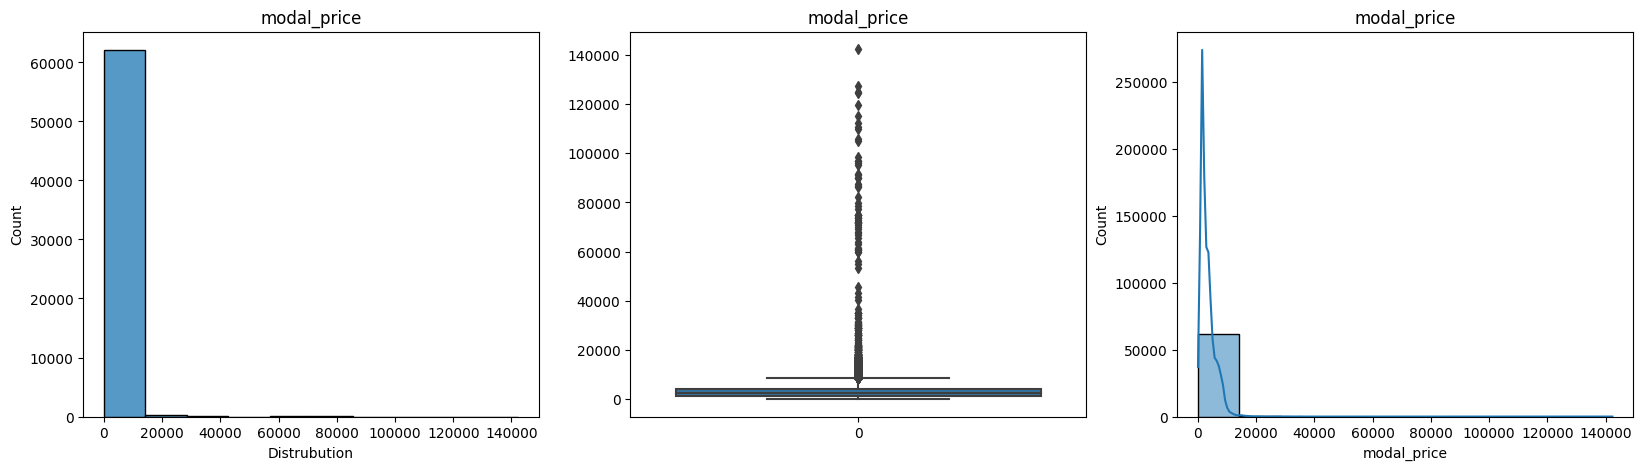

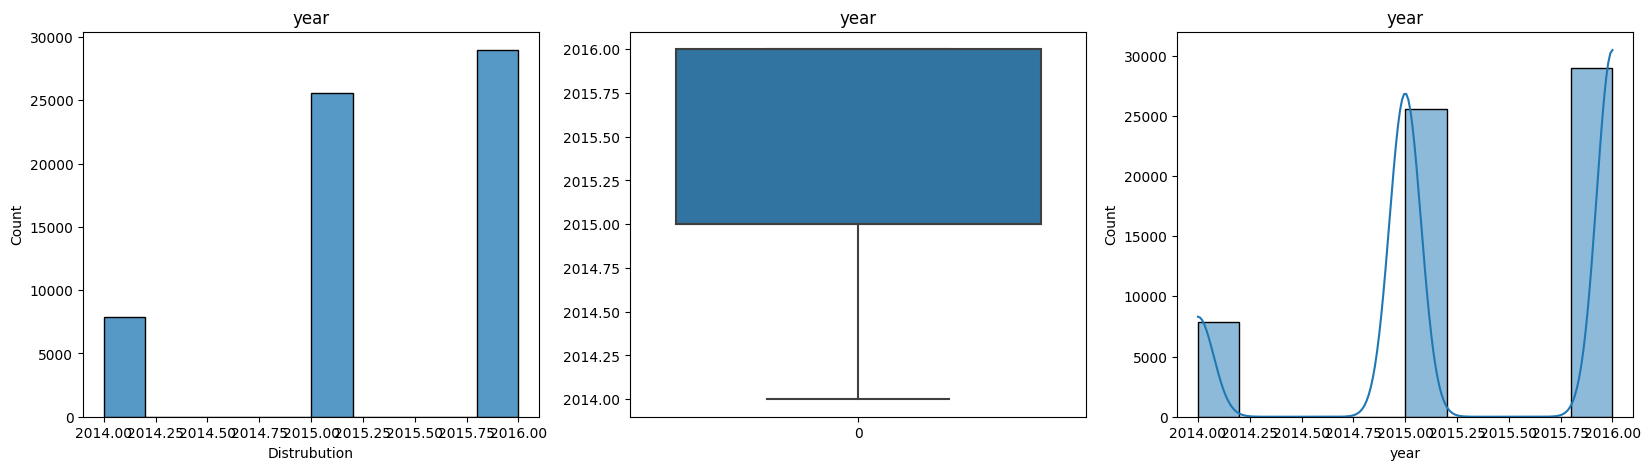

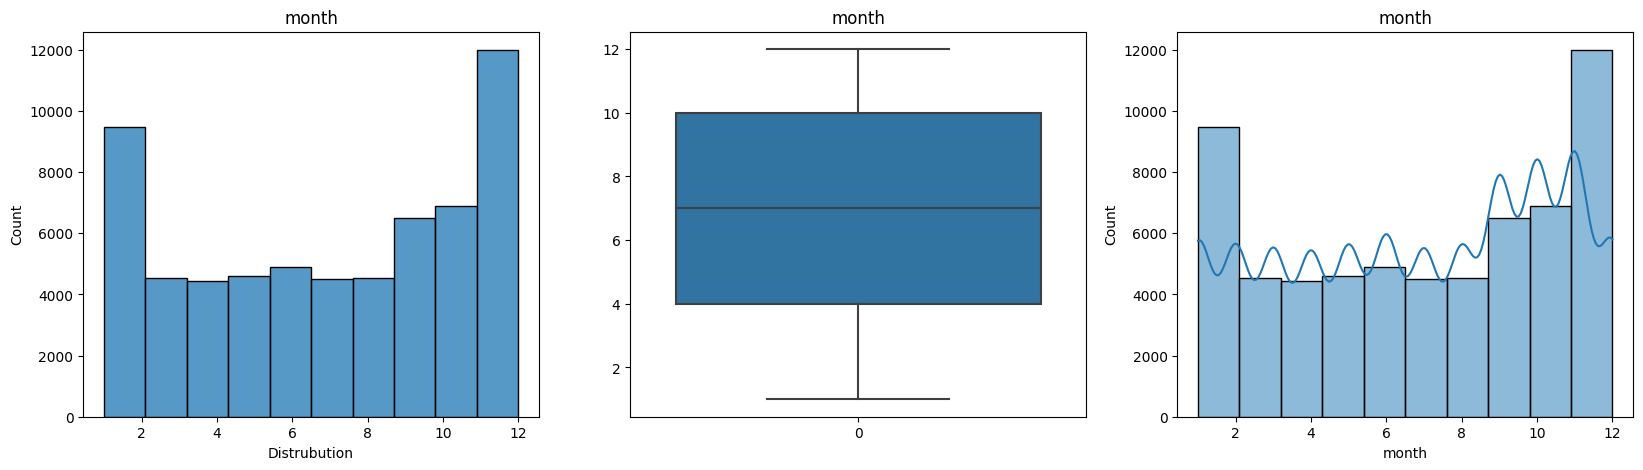

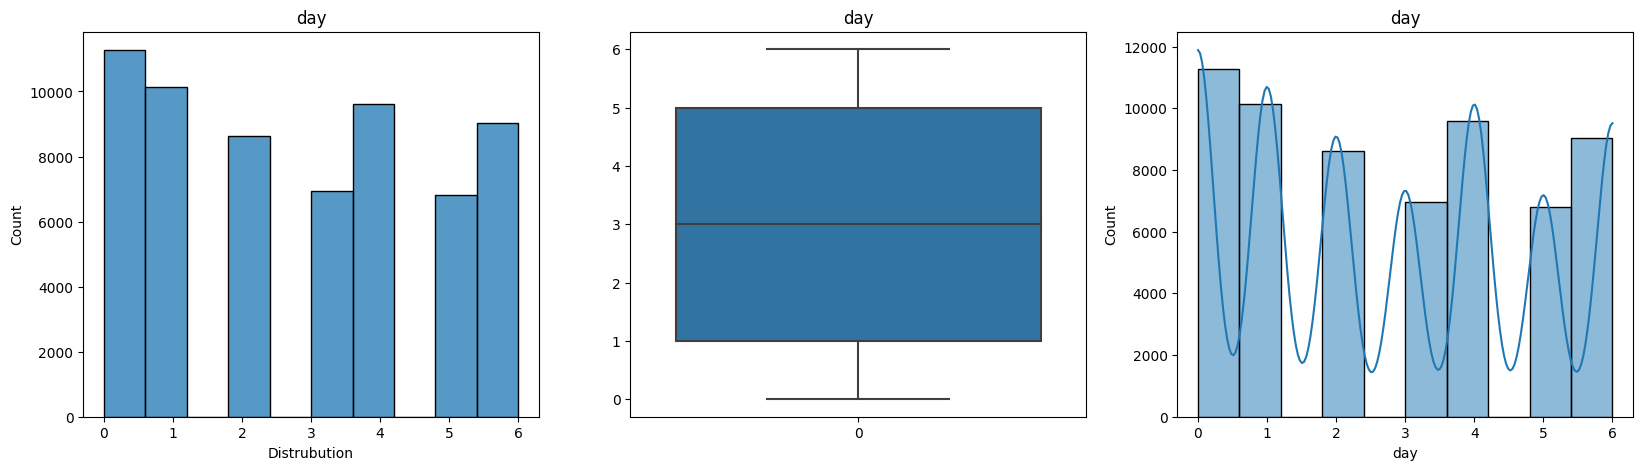

In [25]:
for column in numerical_columns:
    distrubutionPlot(column)

In [26]:
def RemoveOutier(column):
    
    percentile25 = df[column].quantile(0.25)
    percentile75 = df[column].quantile(0.75)
    
    iqr = percentile75 - percentile25
    
    upper_limit = percentile75 + 1.5 * iqr
    lower_limit = percentile25 - 1.5 * iqr
    
    
    df[column+'_METHOD'] = np.where(
    df[column] > upper_limit,
    upper_limit,
    np.where(
        df[column] < lower_limit,
        lower_limit,
        df[column]))
    
    
    plt.figure(figsize=(20, 5))
    
    plt.subplot(1, 2, 1)
    plt.title(column)
    sns.boxplot(data=df[column])
        
    plt.subplot(1, 2, 2)
    plt.title(column+'_METHOD')
    sns.boxplot(data=df[column+'_METHOD'])
    
   

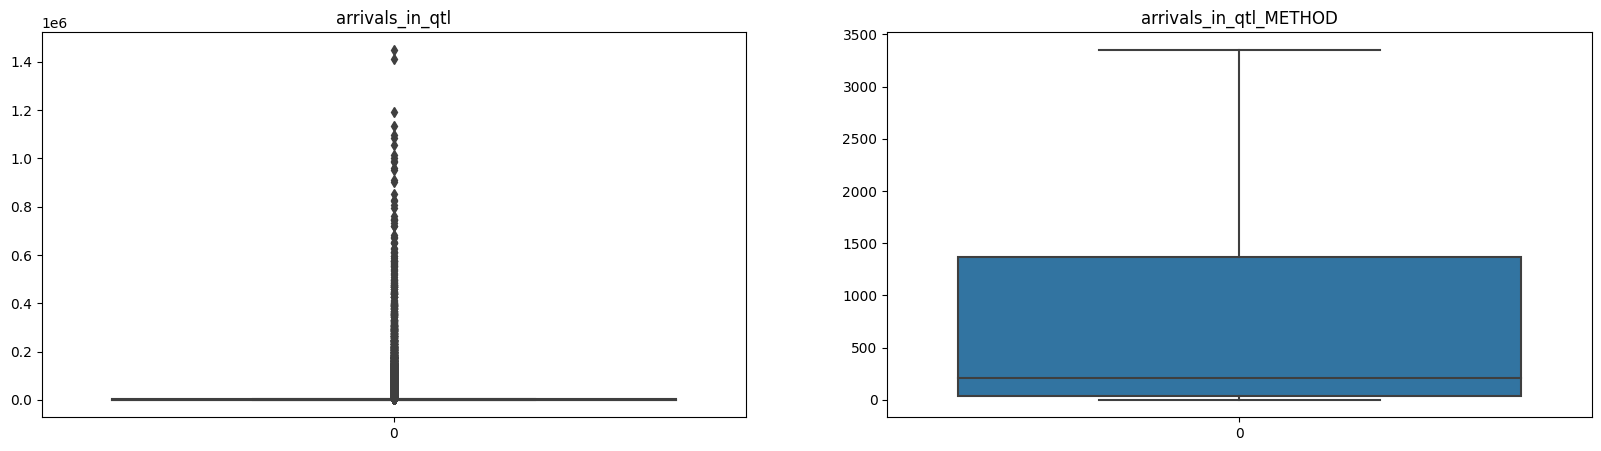

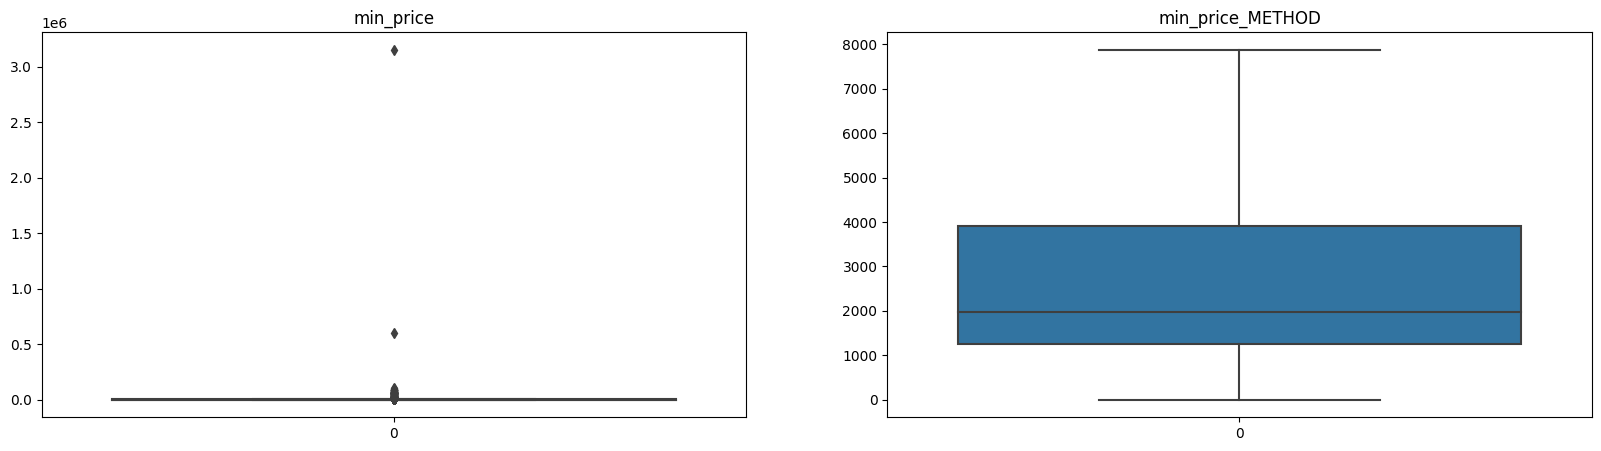

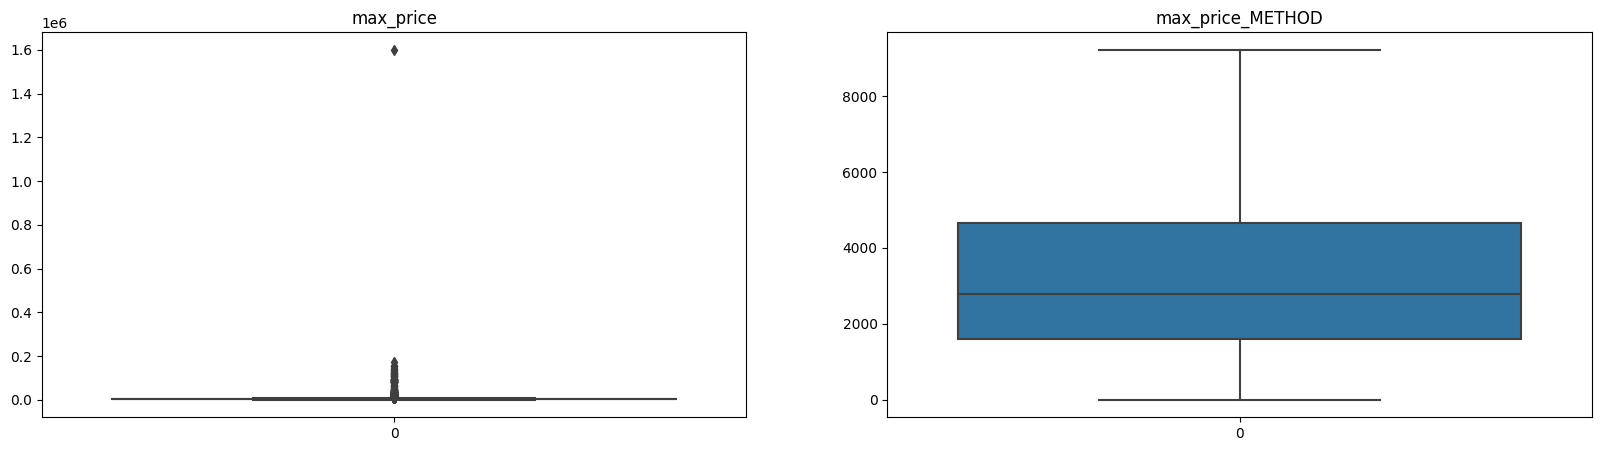

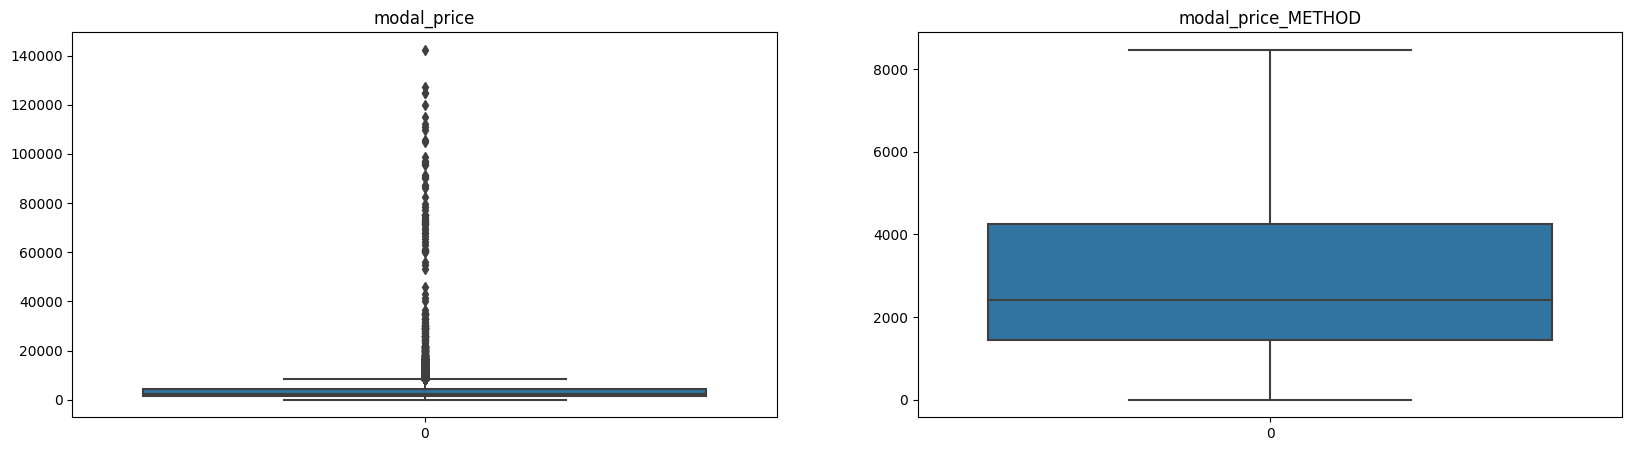

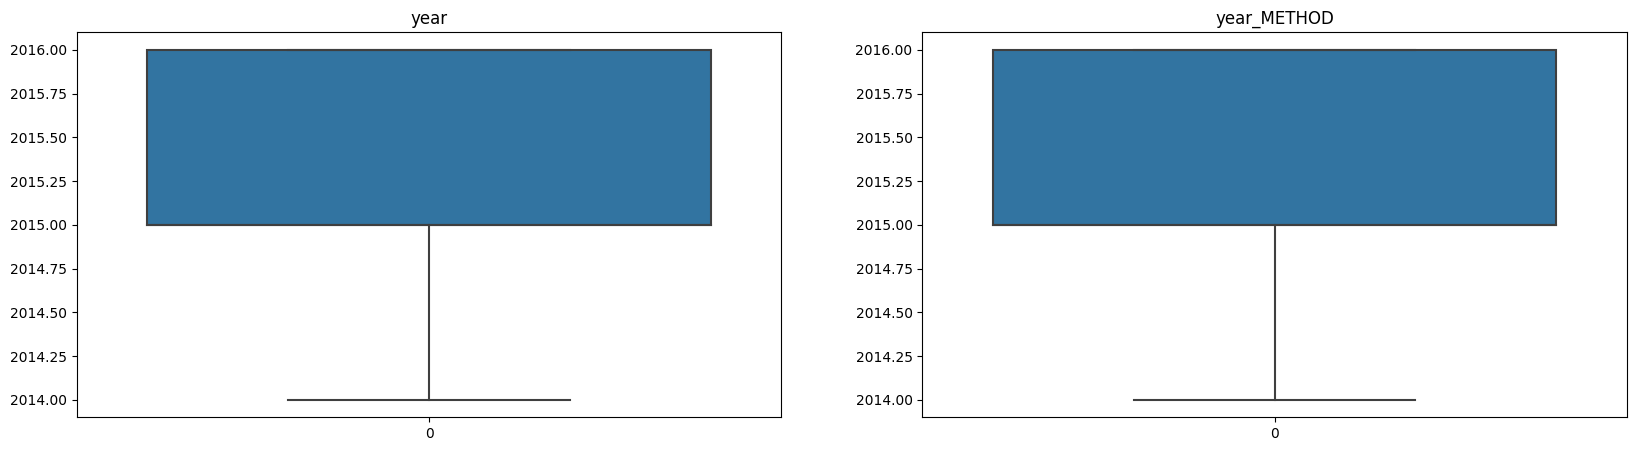

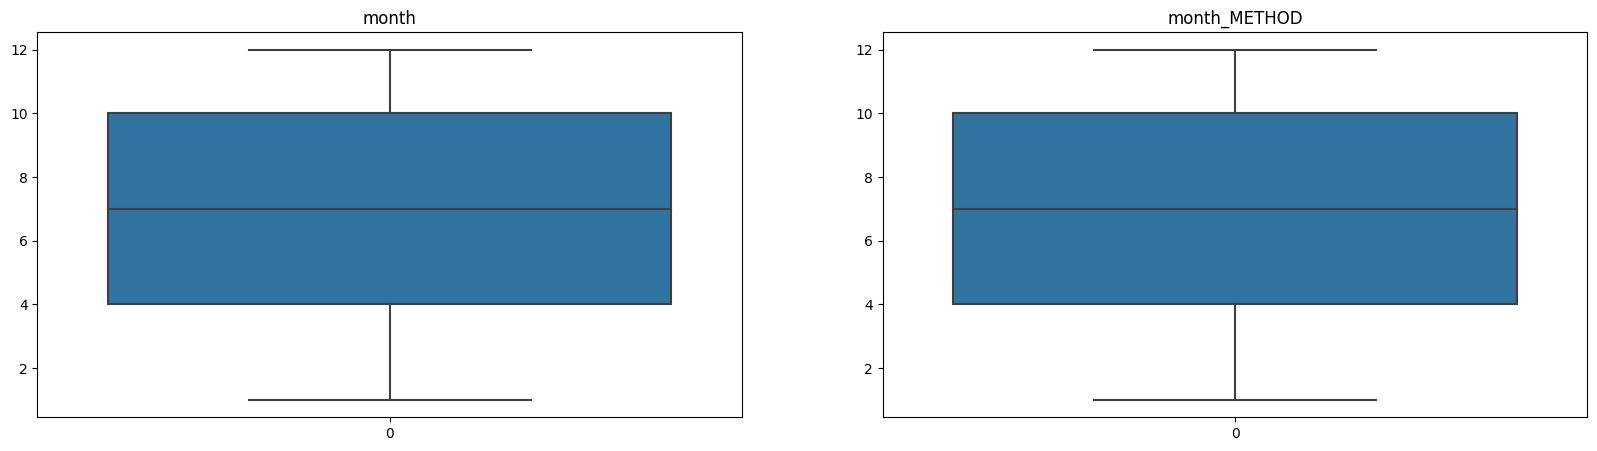

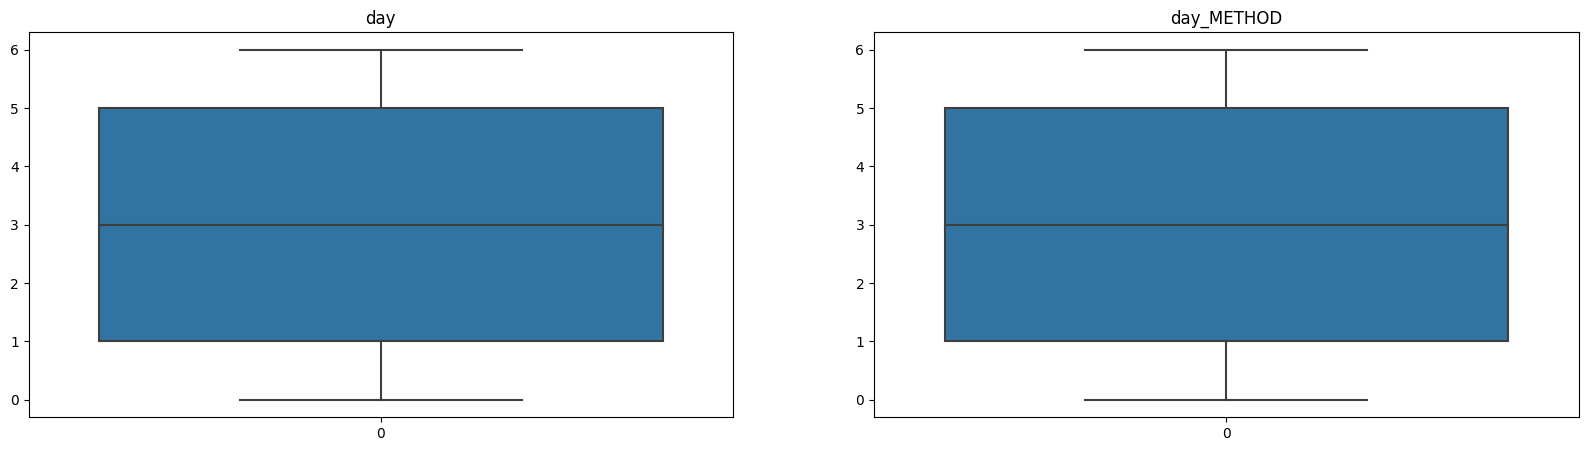

In [27]:
for column in numerical_columns:
    RemoveOutier(column)

In [28]:
df.drop(numerical_columns, axis=1, inplace=True)

In [29]:
def CategoryPlot(column):
    
    plt.figure(figsize=(20, 5))
    
    plt.subplot(1, 2, 1)
    df[column].value_counts().sort_values(ascending=False).head(10).plot(kind='barh')
    plt.title("The Frequency distrubution of {}".format(column))
    
    plt.subplot(1, 2, 2)
    palette_color = sns.color_palette('bright')
    plt.pie(x=df[column].value_counts().sort_values(ascending=False).head(10) / df.shape[0] * 100, 
              labels=df[column].value_counts().sort_values(ascending=False).head(10).index.tolist(), autopct='%.0f%%')
    plt.title("The Frequency distrubution of {}".format(column))
    
    plt.show()

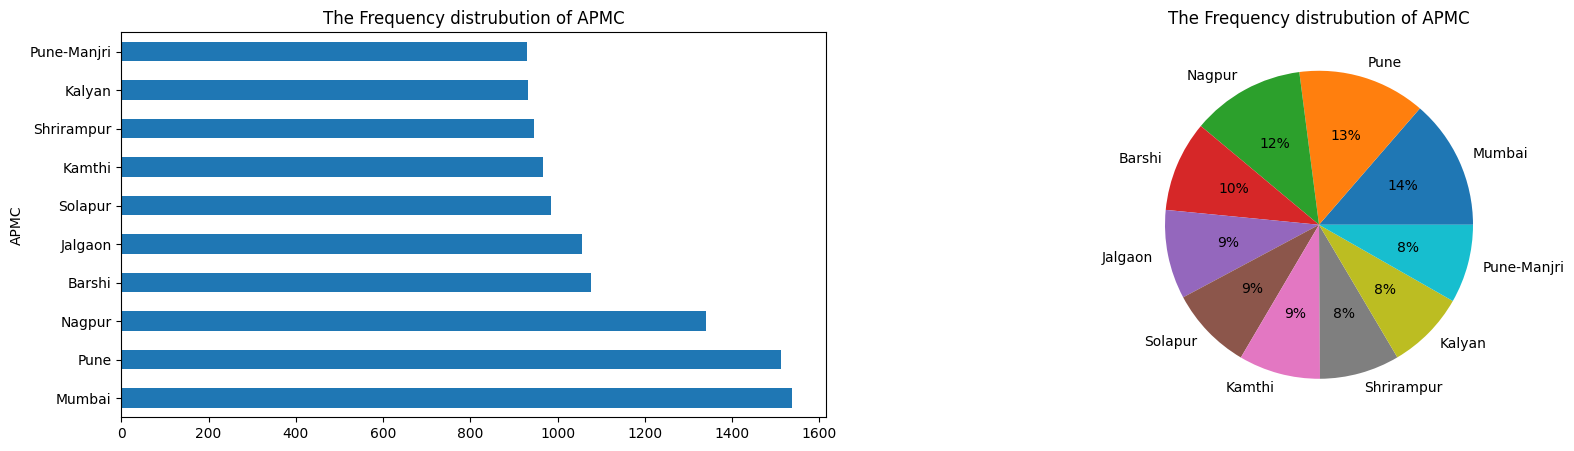

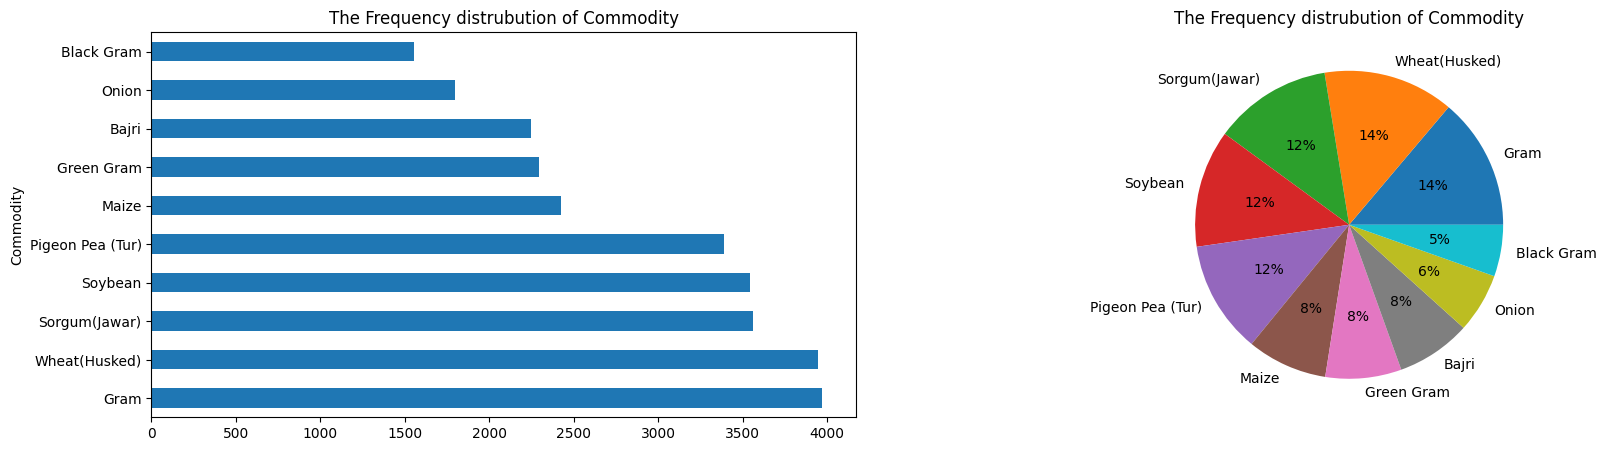

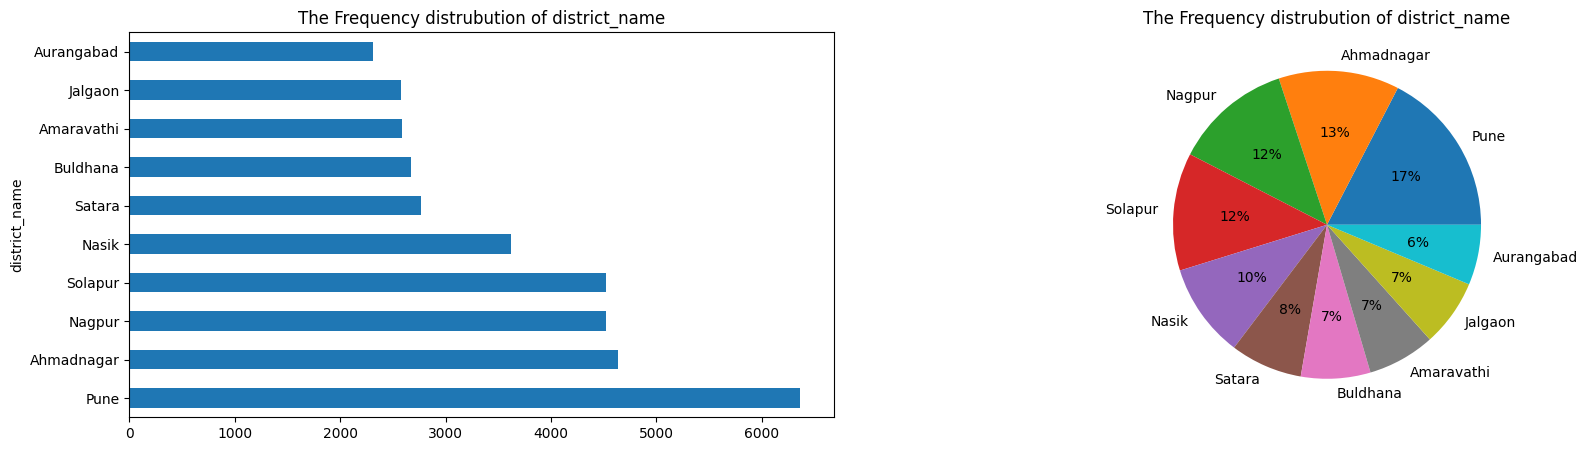

In [30]:
for col in categorical_columns:
    CategoryPlot(col)

In [41]:
df.dtypes

APMC                              object
Commodity                         object
date                      datetime64[ns]
district_name                     object
arrivals_in_qtl_METHOD           float64
min_price_METHOD                 float64
max_price_METHOD                 float64
modal_price_METHOD               float64
year_METHOD                      float64
month_METHOD                     float64
day_METHOD                       float64
dtype: object

In [45]:
correlation_matrix = df[['arrivals_in_qtl_METHOD', 'min_price_METHOD', 'modal_price_METHOD', 'year_METHOD', 'month_METHOD', 'day_METHOD']].corr()
correlation_matrix

,arrivals_in_qtl_METHOD,min_price_METHOD,modal_price_METHOD,year_METHOD,month_METHOD,day_METHOD
arrivals_in_qtl_METHOD,1.000000,-0.109053,-0.067154,0.007183,-0.027063,0.014194
min_price_METHOD,-0.109053,1.000000,0.971147,0.058602,-0.006278,0.018401
modal_price_METHOD,-0.067154,0.971147,1.000000,0.067998,0.000850,0.020762
year_METHOD,0.007183,0.058602,0.067998,1.000000,-0.372246,0.067757
month_METHOD,-0.027063,-0.006278,0.000850,-0.372246,1.000000,-0.152652
day_METHOD,0.014194,0.018401,0.020762,0.067757,-0.152652,1.000000


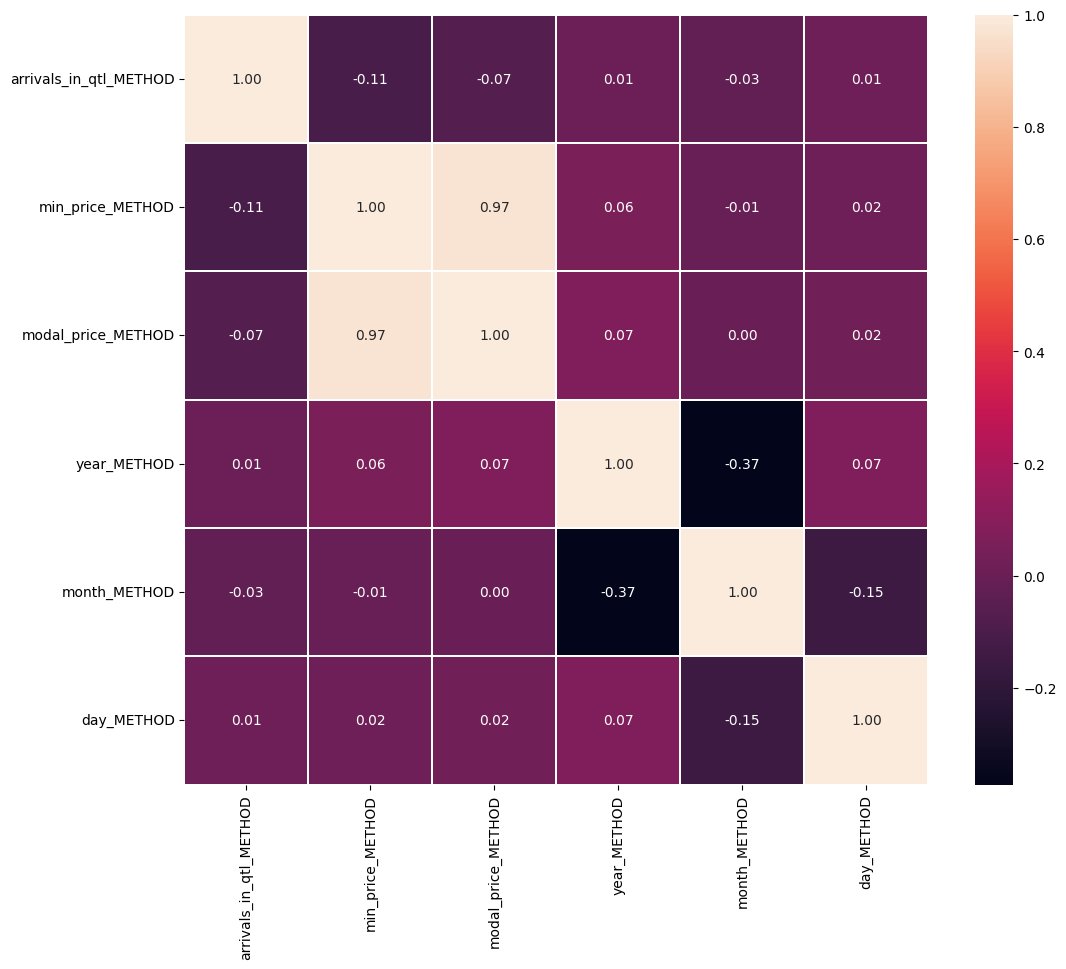

In [46]:
plt.figure(figsize=(12, 10))
corr = df[['arrivals_in_qtl_METHOD', 'min_price_METHOD', 'modal_price_METHOD', 'year_METHOD', 'month_METHOD', 'day_METHOD']].corr()
sns.heatmap(corr, annot=True, fmt='.2f', linewidths=.05)
plt.show();

In [47]:
correlation_matrix['modal_price_METHOD'].sort_values(ascending=False)

modal_price_METHOD        1.000000
min_price_METHOD          0.971147
year_METHOD               0.067998
day_METHOD                0.020762
month_METHOD              0.000850
arrivals_in_qtl_METHOD   -0.067154
Name: modal_price_METHOD, dtype: float64

In [32]:
for x in categorical_columns:
    print(x ,':', len(df[x].unique()))

APMC : 349
Commodity : 352
district_name : 33


In [33]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier

In [34]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(df.drop(['modal_price_METHOD', 'date'], axis=1), 
                                                 df['modal_price_METHOD'], test_size=0.01, random_state=2)

In [35]:
X_train

,APMC,Commodity,district_name,arrivals_in_qtl_METHOD,min_price_METHOD,max_price_METHOD,year_METHOD,month_METHOD,day_METHOD
28280,Kalmeshwar,Brinjal,Nagpur,94.0,515.0,658.0,2015.0,2.0,6.0
58905,Babhulgaon,Soybean,Yewatmal,1100.0,3376.0,3708.0,2016.0,7.0,4.0
20337,Jalgaon,Ginger (Fresh),Jalgaon,1230.0,1852.0,3329.0,2015.0,5.0,4.0
6377,Chandur Bajar,Sorgum(Jawar),Amaravathi,675.0,1213.0,1400.0,2016.0,1.0,4.0
55707,Palghar(Bevur),Onion,Thane,456.0,1185.0,1185.0,2016.0,1.0,4.0
...,...,...,...,...,...,...,...,...,...
44566,Pune-Pimpri,Brinjal,Pune,35.0,1718.0,2609.0,2015.0,11.0,6.0
30280,Umared,Linseed,Nagpur,5.0,6373.0,6373.0,2016.0,5.0,6.0
6637,Varud-Rajura Bazar,Wheat(Husked),Amaravathi,33.0,1684.0,1784.0,2016.0,7.0,4.0
35343,Satana,Gram,Nasik,313.0,3440.0,4249.0,2015.0,6.0,0.0


In [36]:
X_test.shape

(625, 9)

In [37]:
from sklearn.preprocessing import MinMaxScaler
from xgboost import XGBRegressor
from sklearn.metrics import r2_score,mean_absolute_error, mean_squared_error

In [39]:
from xgboost import XGBRegressor

In [38]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import RandomForestRegressor
import lightgbm as lgb
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
import catboost as cb

ModuleNotFoundError: No module named 'lightgbm'

# 1. XGB Regressor

In [40]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf', OneHotEncoder(sparse=False, handle_unknown='ignore'),[0, 1, 2])
],remainder='passthrough')

step2 = ColumnTransformer(transformers=[
    ('col_scale', MinMaxScaler(), slice(0,742))
])

step3 = XGBRegressor()

pipe1 = Pipeline([
    ('step1',step1),
    ('step2',step2),
    ('step3',step3)
])

pipe1.fit(X_train,y_train)

y_train_pred = pipe1.predict(X_train)
y_test_pred = pipe1.predict(X_test)

xgb_train_mae = mean_absolute_error(y_train, y_train_pred) 
xgb_train_mse = mean_squared_error(y_train, y_train_pred) 
xgb_train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
xgb_train_r2 = r2_score(y_train, y_train_pred) 

xgb_test_mae = mean_absolute_error(y_test, y_test_pred) 
xgb_test_mse = mean_squared_error(y_test, y_test_pred)
xgb_test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred)) 
xgb_test_r2 = r2_score(y_test, y_test_pred) 

print('Model performance for Training set')
print('- MAE: %s' % xgb_train_mae)
print('- MSE: %s' % xgb_train_mse)
print('- RMSE: %s' % xgb_train_rmse)
print('- R2 SCORE: %s' % xgb_train_r2)
print('----------------------------------')
print('Model performance for Test set')
print('- MAE: %s' % xgb_test_mae)
print('- MSE: %s' % xgb_test_mse)
print('- RMSE: %s' % xgb_test_rmse)
print('- R2 SCORE: %s' % xgb_test_r2)

C:\Users\ABC\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Model performance for Training set
- MAE: 64.23637064047455
- MSE: 15492.712012121705
- RMSE: 124.46972327486594
- R2 SCORE: 0.9968702611272311
----------------------------------
Model performance for Test set
- MAE: 81.66115861434936
- MSE: 35281.93446453982
- RMSE: 187.83485955631298
- R2 SCORE: 0.9931699155084849


In [42]:
import pickle

In [43]:
pickle.dump(pipe1, open("Pipe1", 'wb'))

# 2. Extra tree classifier

In [ ]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf', OneHotEncoder(sparse=False, handle_unknown='ignore'),[0, 1, 2])
],remainder='passthrough')

step2 = ColumnTransformer(transformers=[
    ('col_scale', MinMaxScaler(), slice(0,742))
])

step3 = ExtraTreesRegressor()

pipe2 = Pipeline([
    ('step1',step1),
    ('step2',step2),
    ('step3',step3)
])

pipe2.fit(X_train,y_train)

y_train_pred = pipe2.predict(X_train)
y_test_pred = pipe2.predict(X_test)

etr_train_mae = mean_absolute_error(y_train, y_train_pred) 
etr_train_mse = mean_squared_error(y_train, y_train_pred) 
etr_train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
etr_train_r2 = r2_score(y_train, y_train_pred) 

etr_test_mae = mean_absolute_error(y_test, y_test_pred) 
etr_test_mse = mean_squared_error(y_test, y_test_pred)
etr_test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred)) 
etr_test_r2 = r2_score(y_test, y_test_pred) 

print('Model performance for Training set')
print('- MAE: %s' % etr_train_mae)
print('- MSE: %s' % etr_train_mse)
print('- RMSE: %s' % etr_train_rmse)
print('- R2 SCORE: %s' % etr_train_r2)
print('----------------------------------')
print('Model performance for Test set')
print('- MAE: %s' % etr_test_mae)
print('- MSE: %s' % etr_test_mse)
print('- RMSE: %s' % etr_test_rmse)
print('- R2 SCORE: %s' % etr_test_r2)

Model performance for Training set
- MAE: 2.168144456668971e-05
- MSE: 8.274545336871063e-06
- RMSE: 0.002876550944598594
- R2 SCORE: 0.9999999999983284
----------------------------------
Model performance for Test set
- MAE: 63.400096000000005
- MSE: 31511.310988880003
- RMSE: 177.51425573423674
- R2 SCORE: 0.9938998549892787


# 3. Random forest regressor

In [ ]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf', OneHotEncoder(sparse=False, handle_unknown='ignore'),[0, 1, 2])
],remainder='passthrough')

step2 = ColumnTransformer(transformers=[
    ('col_scale', MinMaxScaler(), slice(0,742))
])

step3 = RandomForestRegressor()

pipe3 = Pipeline([
    ('step1',step1),
    ('step2',step2),
    ('step3',step3)
])

pipe3.fit(X_train,y_train)

y_train_pred = pipe3.predict(X_train)
y_test_pred = pipe3.predict(X_test)

rfr_train_mae = mean_absolute_error(y_train, y_train_pred) 
rfr_train_mse = mean_squared_error(y_train, y_train_pred) 
rfr_train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
rfr_train_r2 = r2_score(y_train, y_train_pred) 

rfr_test_mae = mean_absolute_error(y_test, y_test_pred) 
rfr_test_mse = mean_squared_error(y_test, y_test_pred)
rfr_test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred)) 
rfr_test_r2 = r2_score(y_test, y_test_pred) 

print('Model performance for Training set')
print('- MAE: %s' % rfr_train_mae)
print('- MSE: %s' % rfr_train_mse)
print('- RMSE: %s' % rfr_train_rmse)
print('- R2 SCORE: %s' % rfr_train_r2)
print('----------------------------------')
print('Model performance for Test set')
print('- MAE: %s' % rfr_test_mae)
print('- MSE: %s' % rfr_test_mse)
print('- RMSE: %s' % rfr_test_rmse)
print('- R2 SCORE: %s' % rfr_test_r2)

Model performance for Training set
- MAE: 25.006568264190022
- MSE: 4024.6269249057495
- RMSE: 63.43994739047117
- R2 SCORE: 0.9991869705365068
----------------------------------
Model performance for Test set
- MAE: 67.23110399999999
- MSE: 30625.981734159996
- RMSE: 175.00280493226387
- R2 SCORE: 0.9940712422361606


# 4. LGB Regressor

In [ ]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf', OneHotEncoder(sparse=False, handle_unknown='ignore'),[0, 1, 2])
],remainder='passthrough')

step2 = ColumnTransformer(transformers=[
    ('col_scale', MinMaxScaler(), slice(0,742))
])

step3 = lgb.LGBMRegressor()

pipe4 = Pipeline([
    ('step1',step1),
    ('step2',step2),
    ('step3',step3)
])

pipe4.fit(X_train,y_train)

y_train_pred = pipe4.predict(X_train)
y_test_pred = pipe4.predict(X_test)

lgbm_train_mae = mean_absolute_error(y_train, y_train_pred) 
lgbm_train_mse = mean_squared_error(y_train, y_train_pred) 
lgbm_train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
lgbm_train_r2 = r2_score(y_train, y_train_pred) 

lgbm_test_mae = mean_absolute_error(y_test, y_test_pred) 
lgbm_test_mse = mean_squared_error(y_test, y_test_pred)
lgbm_test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred)) 
lgbm_test_r2 = r2_score(y_test, y_test_pred) 

print('Model performance for Training set')
print('- MAE: %s' % lgbm_train_mae)
print('- MSE: %s' % lgbm_train_mse)
print('- RMSE: %s' % lgbm_train_rmse)
print('- R2 SCORE: %s' % lgbm_train_r2)
print('----------------------------------')
print('Model performance for Test set')
print('- MAE: %s' % lgbm_test_mae)
print('- MSE: %s' % lgbm_test_mse)
print('- RMSE: %s' % lgbm_test_rmse)
print('- R2 SCORE: %s' % lgbm_test_r2)

Model performance for Training set
- MAE: 68.31549823391991
- MSE: 22858.14421670029
- RMSE: 151.18910085287328
- R2 SCORE: 0.9953823434878032
----------------------------------
Model performance for Test set
- MAE: 74.43671680148958
- MSE: 31994.71275774029
- RMSE: 178.87065929810927
- R2 SCORE: 0.9938062752302668


# 5 Gradient boosting Regressor

In [ ]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf', OneHotEncoder(sparse=False, handle_unknown='ignore'),[0, 1, 2])
],remainder='passthrough')

step2 = ColumnTransformer(transformers=[
    ('col_scale', MinMaxScaler(), slice(0,742))
])

step3 = GradientBoostingRegressor()

pipe5 = Pipeline([
    ('step1',step1),
    ('step2',step2),
    ('step3',step3)
])

pipe5.fit(X_train,y_train)

y_train_pred = pipe5.predict(X_train)
y_test_pred = pipe5.predict(X_test)

gbr_train_mae = mean_absolute_error(y_train, y_train_pred) 
gbr_train_mse = mean_squared_error(y_train, y_train_pred) 
gbr_train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
gbr_train_r2 = r2_score(y_train, y_train_pred) 

gbr_test_mae = mean_absolute_error(y_test, y_test_pred) 
gbr_test_mse = mean_squared_error(y_test, y_test_pred)
gbr_test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred)) 
gbr_test_r2 = r2_score(y_test, y_test_pred) 

print('Model performance for Training set')
print('- MAE: %s' % gbr_train_mae)
print('- MSE: %s' % gbr_train_mse)
print('- RMSE: %s' % gbr_train_rmse)
print('- R2 SCORE: %s' % gbr_train_r2)
print('----------------------------------')
print('Model performance for Test set')
print('- MAE: %s' % gbr_test_mae)
print('- MSE: %s' % gbr_test_mse)
print('- RMSE: %s' % gbr_test_rmse)
print('- R2 SCORE: %s' % gbr_test_r2)

Model performance for Training set
- MAE: 89.6289937052569
- MSE: 36007.341813147985
- RMSE: 189.75600600020013
- R2 SCORE: 0.9927260264510492
----------------------------------
Model performance for Test set
- MAE: 92.05471702883779
- MSE: 36933.65509483676
- RMSE: 192.18130787055426
- R2 SCORE: 0.9928501657092599


# 6. Cat Boost Regressor

In [ ]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf', OneHotEncoder(sparse=False, handle_unknown='ignore'),[0, 1, 2])
],remainder='passthrough')

step2 = ColumnTransformer(transformers=[
    ('col_scale', MinMaxScaler(), slice(0,742))
])

step3 = cb.CatBoostRegressor(loss_function='RMSE')

pipe6 = Pipeline([
    ('step1',step1),
    ('step2',step2),
    ('step3',step3)
])

pipe6.fit(X_train,y_train)

y_train_pred = pipe6.predict(X_train)
y_test_pred = pipe6.predict(X_test)

cbr_train_mae = mean_absolute_error(y_train, y_train_pred) 
cbr_train_mse = mean_squared_error(y_train, y_train_pred) 
cbr_train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
cbr_train_r2 = r2_score(y_train, y_train_pred) 

cbr_test_mae = mean_absolute_error(y_test, y_test_pred) 
cbr_test_mse = mean_squared_error(y_test, y_test_pred)
cbr_test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred)) 
cbr_test_r2 = r2_score(y_test, y_test_pred) 

print('Model performance for Training set')
print('- MAE: %s' % cbr_train_mae)
print('- MSE: %s' % cbr_train_mse)
print('- RMSE: %s' % cbr_train_rmse)
print('- R2 SCORE: %s' % cbr_train_r2)
print('----------------------------------')
print('Model performance for Test set')
print('- MAE: %s' % cbr_test_mae)
print('- MSE: %s' % cbr_test_mse)
print('- RMSE: %s' % cbr_test_rmse)
print('- R2 SCORE: %s' % cbr_test_r2)

Learning rate set to 0.078553
0:	learn: 2063.6138787	total: 60.1ms	remaining: 1m
1:	learn: 1912.6546476	total: 70.3ms	remaining: 35.1s
2:	learn: 1772.0128183	total: 80.3ms	remaining: 26.7s
3:	learn: 1642.5863797	total: 90.2ms	remaining: 22.4s
4:	learn: 1523.0382334	total: 99.7ms	remaining: 19.8s
5:	learn: 1411.6360785	total: 110ms	remaining: 18.2s
6:	learn: 1308.4307990	total: 120ms	remaining: 17.1s
7:	learn: 1213.1397069	total: 132ms	remaining: 16.4s
8:	learn: 1125.3577149	total: 142ms	remaining: 15.6s
9:	learn: 1045.5282040	total: 152ms	remaining: 15s
10:	learn: 971.8918767	total: 162ms	remaining: 14.5s
11:	learn: 904.5401216	total: 171ms	remaining: 14.1s
12:	learn: 842.1929415	total: 180ms	remaining: 13.7s
13:	learn: 785.1139250	total: 189ms	remaining: 13.3s
14:	learn: 732.1633795	total: 199ms	remaining: 13.1s
15:	learn: 683.5508450	total: 209ms	remaining: 12.9s
16:	learn: 639.1254307	total: 219ms	remaining: 12.7s
17:	learn: 598.6234429	total: 229ms	remaining: 12.5s
18:	learn: 560.5

# Combining all models prediction

In [ ]:
models = [pipe1, pipe2, pipe3, pipe4, pipe5, pipe6]

In [ ]:
preds = [model.predict(X_test) for model in models]

In [ ]:
preds = np.array(preds)

In [ ]:
preds.shape

(6, 625)

In [ ]:
preds = np.transpose(preds)

In [ ]:
preds.shape

(625, 6)

In [ ]:
df = pd.DataFrame(preds, columns = ['Model 1', 'Model 2', 'Model 3', 'Model 4', 'Model 5', 'Model 6'])

In [ ]:
data = df.mean(axis = 1)

In [ ]:
df['Mean'] = data

In [ ]:
df['Actual_Predction'] = y_test.values

In [ ]:
df

,Model 1,Model 2,Model 3,Model 4,Model 5,Model 6,Mean,Actual_Predction
0,7858.543457,7860.05,7826.18,7820.955024,7892.622138,7904.073179,7860.403966,7821.0
1,7914.531738,7870.63,7850.27,7939.695372,7948.258978,7971.152127,7915.756369,8113.0
2,6525.658203,6598.43,6602.20,6596.130899,6540.352129,6485.397828,6558.028176,6806.0
3,1562.832520,1574.64,1581.09,1590.451225,1566.560704,1564.114712,1573.281527,1604.0
4,399.946899,399.90,400.00,416.460006,410.156653,362.751359,398.202486,390.0
...,...,...,...,...,...,...,...,...
620,3186.568604,3040.38,3008.65,3019.460543,3187.764994,3007.147525,3074.995278,3000.0
621,4890.383789,4807.48,4862.29,4901.822589,4885.704388,4828.969823,4862.775098,4750.0
622,1378.902710,1320.35,1321.03,1321.507672,1381.894661,1346.116819,1344.966977,935.0
623,4679.577637,4705.45,4719.84,4694.587139,4682.716873,4681.899698,4694.011891,4700.0


In [ ]:
print('R2 score',r2_score(df['Actual_Predction'],df['Mean']))
print('MAE',mean_absolute_error(df['Actual_Predction'],df['Mean']))

R2 score 0.9942793186390089
MAE 71.51253647641344


# Stacking of 6 models

In [ ]:
from sklearn.ensemble import StackingRegressor

step1 = ColumnTransformer(transformers=[
    ('col_tnf', OneHotEncoder(sparse=False, handle_unknown='ignore'),[0, 1, 2])
],remainder='passthrough')

step2 = ColumnTransformer(transformers=[
    ('col_scale', MinMaxScaler(), slice(0,742))
])

estimators = [
    ('etr', ExtraTreesRegressor()),
    ('rfr', RandomForestRegressor()),
    ('lgbr', lgb.LGBMRegressor()),
    ('gbr', GradientBoostingRegressor()),
    ('cbr', cb.CatBoostRegressor(loss_function='RMSE'))
]

step3 = StackingRegressor(estimators=estimators, final_estimator=XGBRegressor())

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2),
    ('step3',step3)
])

pipe.fit(X_train,y_train)

y_train_pred = pipe.predict(X_train)
y_test_pred = pipe.predict(X_test)

stk_train_mae = mean_absolute_error(y_train, y_train_pred) 
stk_train_mse = mean_squared_error(y_train, y_train_pred) 
stk_train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
stk_train_r2 = r2_score(y_train, y_train_pred) 

stk_test_mae = mean_absolute_error(y_test, y_test_pred) 
stk_test_mse = mean_squared_error(y_test, y_test_pred)
stk_test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred)) 
stk_test_r2 = r2_score(y_test, y_test_pred) 

print('Model performance for Training set')
print('- MAE: %s' % stk_train_mae)
print('- MSE: %s' % stk_train_mse)
print('- RMSE: %s' % stk_train_rmse)
print('- R2 SCORE: %s' % stk_train_r2)
print('----------------------------------')
print('Model performance for Test set')
print('- MAE: %s' % stk_test_mae)
print('- MSE: %s' % stk_test_mse)
print('- RMSE: %s' % stk_test_rmse)
print('- R2 SCORE: %s' % stk_test_r2)

Streaming output truncated to the last 5000 lines.
16:	learn: 664.3900329	total: 140ms	remaining: 8.12s
17:	learn: 622.7495227	total: 153ms	remaining: 8.36s
18:	learn: 585.3612179	total: 162ms	remaining: 8.36s
19:	learn: 549.7094600	total: 170ms	remaining: 8.31s
20:	learn: 517.7152397	total: 179ms	remaining: 8.34s
21:	learn: 487.8978297	total: 186ms	remaining: 8.29s
22:	learn: 460.1882830	total: 194ms	remaining: 8.23s
23:	learn: 435.3646727	total: 201ms	remaining: 8.19s
24:	learn: 412.7586979	total: 209ms	remaining: 8.16s
25:	learn: 392.5081819	total: 217ms	remaining: 8.13s
26:	learn: 373.6880126	total: 224ms	remaining: 8.09s
27:	learn: 355.9618134	total: 232ms	remaining: 8.05s
28:	learn: 340.2716785	total: 240ms	remaining: 8.03s
29:	learn: 326.1253340	total: 255ms	remaining: 8.23s
30:	learn: 313.4885620	total: 265ms	remaining: 8.29s
31:	learn: 302.1733829	total: 272ms	remaining: 8.24s
32:	learn: 291.6200908	total: 280ms	remaining: 8.2s
33:	learn: 282.2394659	total: 288ms	remaining: 8.

# Train Data error analysis

In [ ]:
mae_train_list = {'xgb':xgb_train_mae,
'etr': etr_train_mae,
'rfr': rfr_train_mae,
'lgbm': lgbm_train_mae,
'gbr': gbr_train_mae,
'cbr': cbr_train_mae,
'stack': stk_train_mae}

mse_train_list = {'xgb':xgb_train_mse,
'etr': etr_train_mse,
'rfr': rfr_train_mse,
'lgbm': lgbm_train_mse,
'gbr': gbr_train_mse,
'cbr': cbr_train_mse,
'stack': stk_train_mse}

rmse_train_list = {'xgb':xgb_train_rmse,
'etr': etr_train_rmse,
'rfr': rfr_train_rmse,
'lgbm': lgbm_train_rmse,
'gbr': gbr_train_rmse,
'cbr': cbr_train_rmse,
'stack': stk_train_rmse}

r2_train_list = {'xgb':xgb_train_r2,
'etr': etr_train_r2,
'rfr': rfr_train_r2,
'lgbm': lgbm_train_r2,
'gbr': gbr_train_r2,
'cbr': cbr_train_r2,
'stack': stk_train_r2}

In [ ]:
mae_df = pd.DataFrame.from_dict(mae_train_list, orient='index', columns=['MAE'])
mse_df = pd.DataFrame.from_dict(mse_train_list, orient='index', columns=['MSE'])
rmse_df = pd.DataFrame.from_dict(rmse_train_list, orient='index', columns=['RMSE'])
r2_df = pd.DataFrame.from_dict(r2_train_list, orient='index', columns=['R2'])
df = pd.concat([mae_df, mse_df, rmse_df, r2_df], axis=1)
df

,MAE,MSE,RMSE,R2
xgb,89.512359,36218.475113,190.311521,0.992683
etr,0.000022,0.000008,0.002877,1.000000
rfr,25.006568,4024.626925,63.439947,0.999187
lgbm,68.315498,22858.144217,151.189101,0.995382
gbr,89.628994,36007.341813,189.756006,0.992726
cbr,67.598382,16672.353345,129.121467,0.996632
stack,41.888467,6711.301085,81.922531,0.998644


# test data error analysis

In [ ]:
mae_test_list = {'xgb':xgb_test_mae,
'etr': etr_test_mae,
'rfr': rfr_test_mae,
'lgbm': lgbm_test_mae,
'gbr': gbr_test_mae,
'cbr': cbr_test_mae,
'stack': stk_test_mae}

mse_test_list = {'xgb':xgb_test_mse,
'etr': etr_test_mse,
'rfr': rfr_test_mse,
'lgbm': lgbm_test_mse,
'gbr': gbr_test_mse,
'cbr': cbr_test_mse,
'stack': stk_test_mse}

rmse_test_list = {'xgb':xgb_test_rmse,
'etr': etr_test_rmse,
'rfr': rfr_test_rmse,
'lgbm': lgbm_test_rmse,
'gbr': gbr_test_rmse,
'cbr': cbr_test_rmse,
'stack': stk_test_rmse}

r2_test_list = {'xgb':xgb_test_r2,
'etr': etr_test_r2,
'rfr': rfr_test_r2,
'lgbm': lgbm_test_r2,
'gbr': gbr_test_r2,
'cbr': cbr_test_r2,
'stack': stk_test_r2}

In [ ]:
mae_df = pd.DataFrame.from_dict(mae_test_list, orient='index', columns=['MAE'])
mse_df = pd.DataFrame.from_dict(mse_test_list, orient='index', columns=['MSE'])
rmse_df = pd.DataFrame.from_dict(rmse_test_list, orient='index', columns=['RMSE'])
r2_df = pd.DataFrame.from_dict(r2_test_list, orient='index', columns=['R2'])
df = pd.concat([mae_df, mse_df, rmse_df, r2_df], axis=1)
df

,MAE,MSE,RMSE,R2
xgb,90.672414,35978.865706,189.680958,0.993035
etr,63.400096,31511.310989,177.514256,0.993900
rfr,67.231104,30625.981734,175.002805,0.994071
lgbm,74.436717,31994.712758,178.870659,0.993806
gbr,92.054717,36933.655095,192.181308,0.992850
cbr,73.926696,28652.184249,169.269561,0.994453
stack,70.687737,30045.827174,173.337322,0.994184
